## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import tensorflow.keras as keras
import itertools
from tensorflow.keras.layers import Dropout

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25, 0.5]
n1 = [512, 256, 128]
n2 = [512, 256, 128, 64]
NUM_NEURONS=[n1, n2]

In [7]:
len(NUM_NEURONS[0])

3

In [8]:
results = {}
xn = NUM_NEURONS[0]
for de, nn in itertools.product(Dropout_EXP, NUM_NEURONS):    
    keras.backend.clear_session()
    i = 0
    if nn != xn:
        i = i+1
    xn = nn
    print("Dropout_EXP = %.2f, Layers = %.2f" %(de, len(NUM_NEURONS[i])))
    
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=de, num_neurons=nn)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "Dropout_EXP = %.2f, Layers = %.2f" %(de, len(NUM_NEURONS[i]))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Dropout_EXP = 0.25, Layers = 3.00
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)        

196/196 [==============================] - 1s 4ms/step - loss: 1.4665 - accuracy: 0.4729 - val_loss: 1.4359 - val_accuracy: 0.4923
Epoch 49/50
196/196 [==============================] - 1s 4ms/step - loss: 1.4635 - accuracy: 0.4734 - val_loss: 1.4307 - val_accuracy: 0.4907
Epoch 50/50
196/196 [==============================] - 1s 4ms/step - loss: 1.4710 - accuracy: 0.4727 - val_loss: 1.4586 - val_accuracy: 0.4848
Dropout_EXP = 0.25, Layers = 4.00
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
hidden

196/196 [==============================] - 1s 4ms/step - loss: 1.6046 - accuracy: 0.4251 - val_loss: 1.5350 - val_accuracy: 0.4561
Epoch 44/50
196/196 [==============================] - 1s 4ms/step - loss: 1.5959 - accuracy: 0.4272 - val_loss: 1.5425 - val_accuracy: 0.4590
Epoch 45/50
196/196 [==============================] - 1s 4ms/step - loss: 1.5997 - accuracy: 0.4269 - val_loss: 1.5720 - val_accuracy: 0.4503
Epoch 46/50
196/196 [==============================] - 1s 4ms/step - loss: 1.5993 - accuracy: 0.4261 - val_loss: 1.5495 - val_accuracy: 0.4622
Epoch 47/50
196/196 [==============================] - 1s 4ms/step - loss: 1.5965 - accuracy: 0.4267 - val_loss: 1.5320 - val_accuracy: 0.4623
Epoch 48/50
196/196 [==============================] - 1s 4ms/step - loss: 1.5888 - accuracy: 0.4298 - val_loss: 1.5393 - val_accuracy: 0.4625
Epoch 49/50
196/196 [==============================] - 1s 4ms/step - loss: 1.5873 - accuracy: 0.4296 - val_loss: 1.5270 - val_accuracy: 0.4642
Epoch 50/50

196/196 [==============================] - 1s 4ms/step - loss: 1.9276 - accuracy: 0.2784 - val_loss: 1.9497 - val_accuracy: 0.2968
Epoch 41/50
196/196 [==============================] - 1s 4ms/step - loss: 1.9254 - accuracy: 0.2780 - val_loss: 1.9647 - val_accuracy: 0.3049
Epoch 42/50
196/196 [==============================] - 1s 4ms/step - loss: 1.9216 - accuracy: 0.2810 - val_loss: 1.9601 - val_accuracy: 0.3142
Epoch 43/50
196/196 [==============================] - 1s 4ms/step - loss: 1.9246 - accuracy: 0.2786 - val_loss: 1.9893 - val_accuracy: 0.2849
Epoch 44/50
196/196 [==============================] - 1s 4ms/step - loss: 1.9251 - accuracy: 0.2767 - val_loss: 1.9881 - val_accuracy: 0.2766
Epoch 45/50
196/196 [==============================] - 1s 4ms/step - loss: 1.9242 - accuracy: 0.2770 - val_loss: 2.0003 - val_accuracy: 0.2873
Epoch 46/50
196/196 [==============================] - 1s 4ms/step - loss: 1.9206 - accuracy: 0.2807 - val_loss: 2.0029 - val_accuracy: 0.2805
Epoch 47/50

196/196 [==============================] - 1s 4ms/step - loss: 2.0338 - accuracy: 0.2184 - val_loss: 2.0381 - val_accuracy: 0.2294
Epoch 36/50
196/196 [==============================] - 1s 4ms/step - loss: 2.0338 - accuracy: 0.2197 - val_loss: 2.0906 - val_accuracy: 0.2209
Epoch 37/50
196/196 [==============================] - 1s 4ms/step - loss: 2.0361 - accuracy: 0.2212 - val_loss: 2.0381 - val_accuracy: 0.2531
Epoch 38/50
196/196 [==============================] - 1s 4ms/step - loss: 2.0361 - accuracy: 0.2196 - val_loss: 2.0481 - val_accuracy: 0.2192
Epoch 39/50
196/196 [==============================] - 1s 4ms/step - loss: 2.0287 - accuracy: 0.2241 - val_loss: 2.0378 - val_accuracy: 0.2238
Epoch 40/50
196/196 [==============================] - 1s 4ms/step - loss: 2.0304 - accuracy: 0.2217 - val_loss: 2.0868 - val_accuracy: 0.2338
Epoch 41/50
196/196 [==============================] - 1s 4ms/step - loss: 2.0288 - accuracy: 0.2197 - val_loss: 2.0503 - val_accuracy: 0.2370
Epoch 42/50

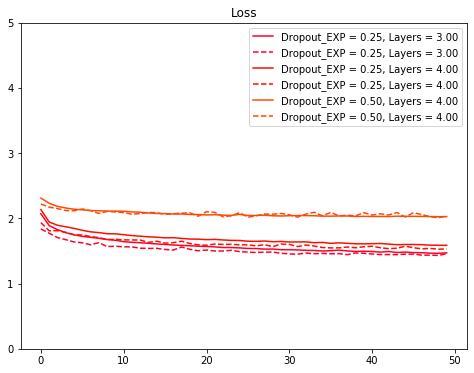

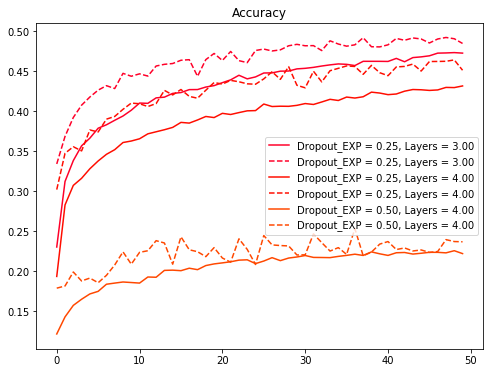

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = 25

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()